In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv("real_estate_processed.csv")
# Check for missing values in the dataset
if data.isnull().values.any():
    data = data.dropna()  # Dropping rows with missing values for simplicity

# Chia dữ liệu thành features và target
X = data.drop('price', axis=1)  # Xác định các features (các cột ngoại trừ cột nhãn)
y = data['price']  # Nhãn cần dự đoán

# Ensure the target variable is in the correct format
y = y.astype(float)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN với số lân cận là 3
knn = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá độ chính xác của mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4.415461537523682e+17
R-squared: 0.5301521656320839


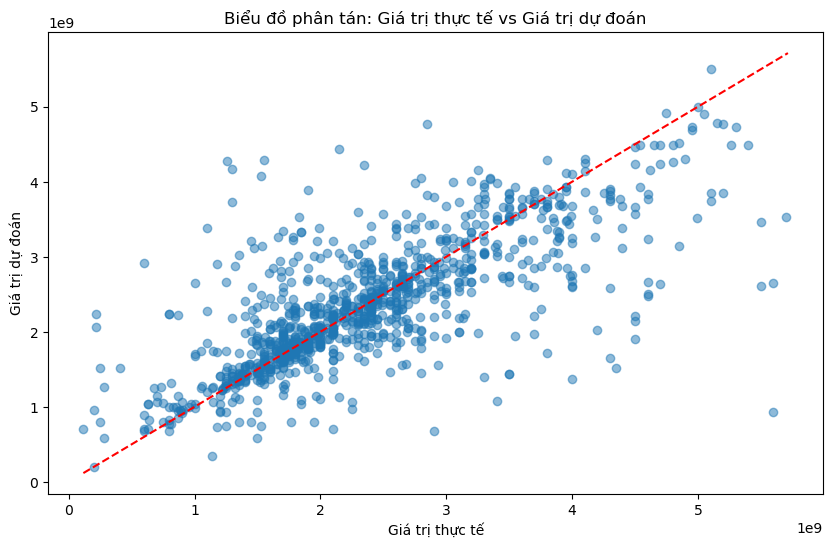

In [21]:
# Vẽ biểu đồ phân tán cho giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ phân tán: Giá trị thực tế vs Giá trị dự đoán")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

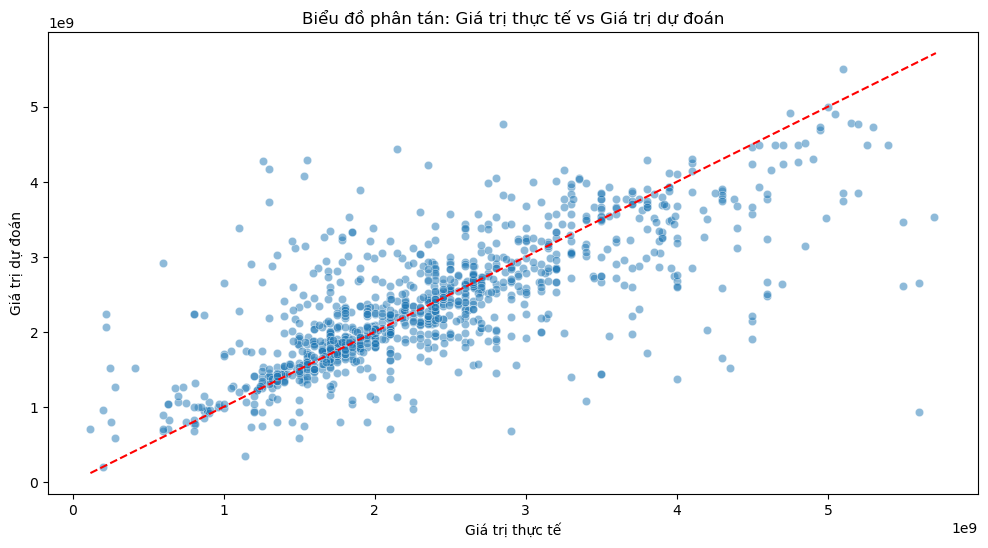

In [26]:
# Vẽ biểu đồ phân tán cho giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ phân tán: Giá trị thực tế vs Giá trị dự đoán")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()
